In [1]:
targetted_precincts = [9, 10, 11, 44, 46, 285, 347, 379, 411, 430, 431, 664, 752, 792, 793]
untargetted_precincts = [472, 789, 99, 112, 524, 725, 141, 725, 595, 487, 261,320, 49, 320, 141]

Zip Codesort column,77002,77003,77004,77005,77006,77007,77008,77009,77010,77011,...,77521,77530,77532,77536,77547,77562,77571,77586,77587,77598
Zip Codesort column,,,,,,,,,,,,,,,,,,,,,
77002,1.000000e+00,6.665712e-01,2.661093e-02,6.502764e-09,6.240299e-05,4.575587e-05,2.477432e-04,2.338781e-04,1.612418e-04,1.134563e-06,...,2.499944e-01,7.777637e-04,2.310054e-02,2.773489e-06,3.157218e-05,3.330111e-03,3.398005e-04,1.497029e-05,4.737499e-08,0.091259
77003,6.665712e-01,1.000000e+00,1.254124e-03,1.786119e-07,1.474105e-03,1.629718e-03,6.690916e-03,1.956893e-02,3.564947e-03,2.102846e-04,...,9.099693e-01,5.465369e-02,1.388236e-01,1.143315e-04,3.013138e-03,5.824955e-02,6.747955e-03,2.217738e-04,1.505757e-05,0.689403
77004,2.661093e-02,1.254124e-03,1.000000e+00,1.061283e-13,8.679088e-11,1.055115e-10,7.052659e-11,2.812642e-11,1.056506e-07,1.660653e-14,...,2.261674e-05,1.036281e-09,1.528900e-08,3.246645e-14,1.551696e-12,5.323317e-10,1.912153e-11,8.649152e-12,5.336737e-16,0.000127
77005,6.502764e-09,1.786119e-07,1.061283e-13,1.000000e+00,1.544933e-01,1.849912e-01,1.207010e-02,9.631356e-07,2.785834e-15,5.224920e-07,...,3.860910e-08,5.936730e-09,4.661280e-06,1.087636e-03,3.553280e-08,1.537877e-06,3.597578e-04,1.517886e-01,4.464257e-08,0.000054
77006,6.240299e-05,1.474105e-03,8.679088e-11,1.544933e-01,1.000000e+00,9.987161e-01,9.231794e-01,9.249153e-03,4.005531e-10,1.977888e-03,...,9.799785e-04,2.139608e-04,3.516430e-02,2.258567e-01,6.097277e-04,1.723244e-02,3.315320e-01,9.747305e-01,1.214723e-04,0.022430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77562,3.330111e-03,5.824955e-02,5.323317e-10,1.537877e-06,1.723244e-02,1.395883e-02,1.714463e-01,8.159718e-01,1.004276e-04,3.191422e-01,...,2.835965e-01,4.339240e-01,9.564289e-01,9.995594e-02,6.491165e-01,1.000000e+00,6.263607e-01,7.266133e-03,5.814030e-02,0.020670
77571,3.398005e-04,6.747955e-03,1.912153e-11,3.597578e-04,3.315320e-01,2.459456e-01,8.616837e-01,3.883515e-01,1.031317e-07,1.648044e-01,...,2.539429e-02,3.112057e-02,6.615468e-01,7.198632e-01,9.782689e-02,6.263607e-01,1.000000e+00,2.934418e-01,1.788122e-02,0.007779
77586,1.497029e-05,2.217738e-04,8.649152e-12,1.517886e-01,9.747305e-01,8.748253e-01,7.952307e-01,2.814642e-03,1.523356e-11,7.955337e-04,...,1.572832e-04,3.383175e-05,1.940444e-02,2.331633e-01,1.580715e-04,7.266133e-03,2.934418e-01,1.000000e+00,4.119034e-05,0.002645


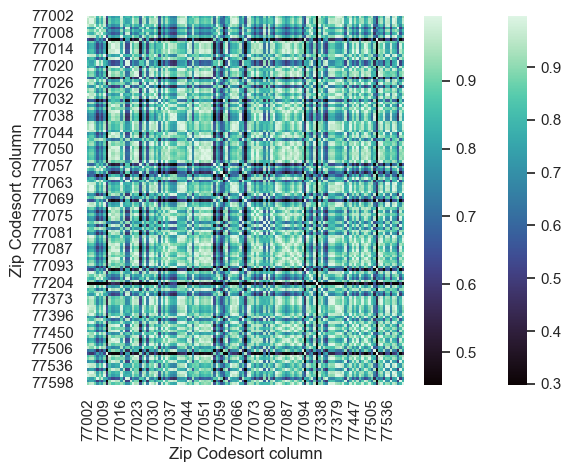

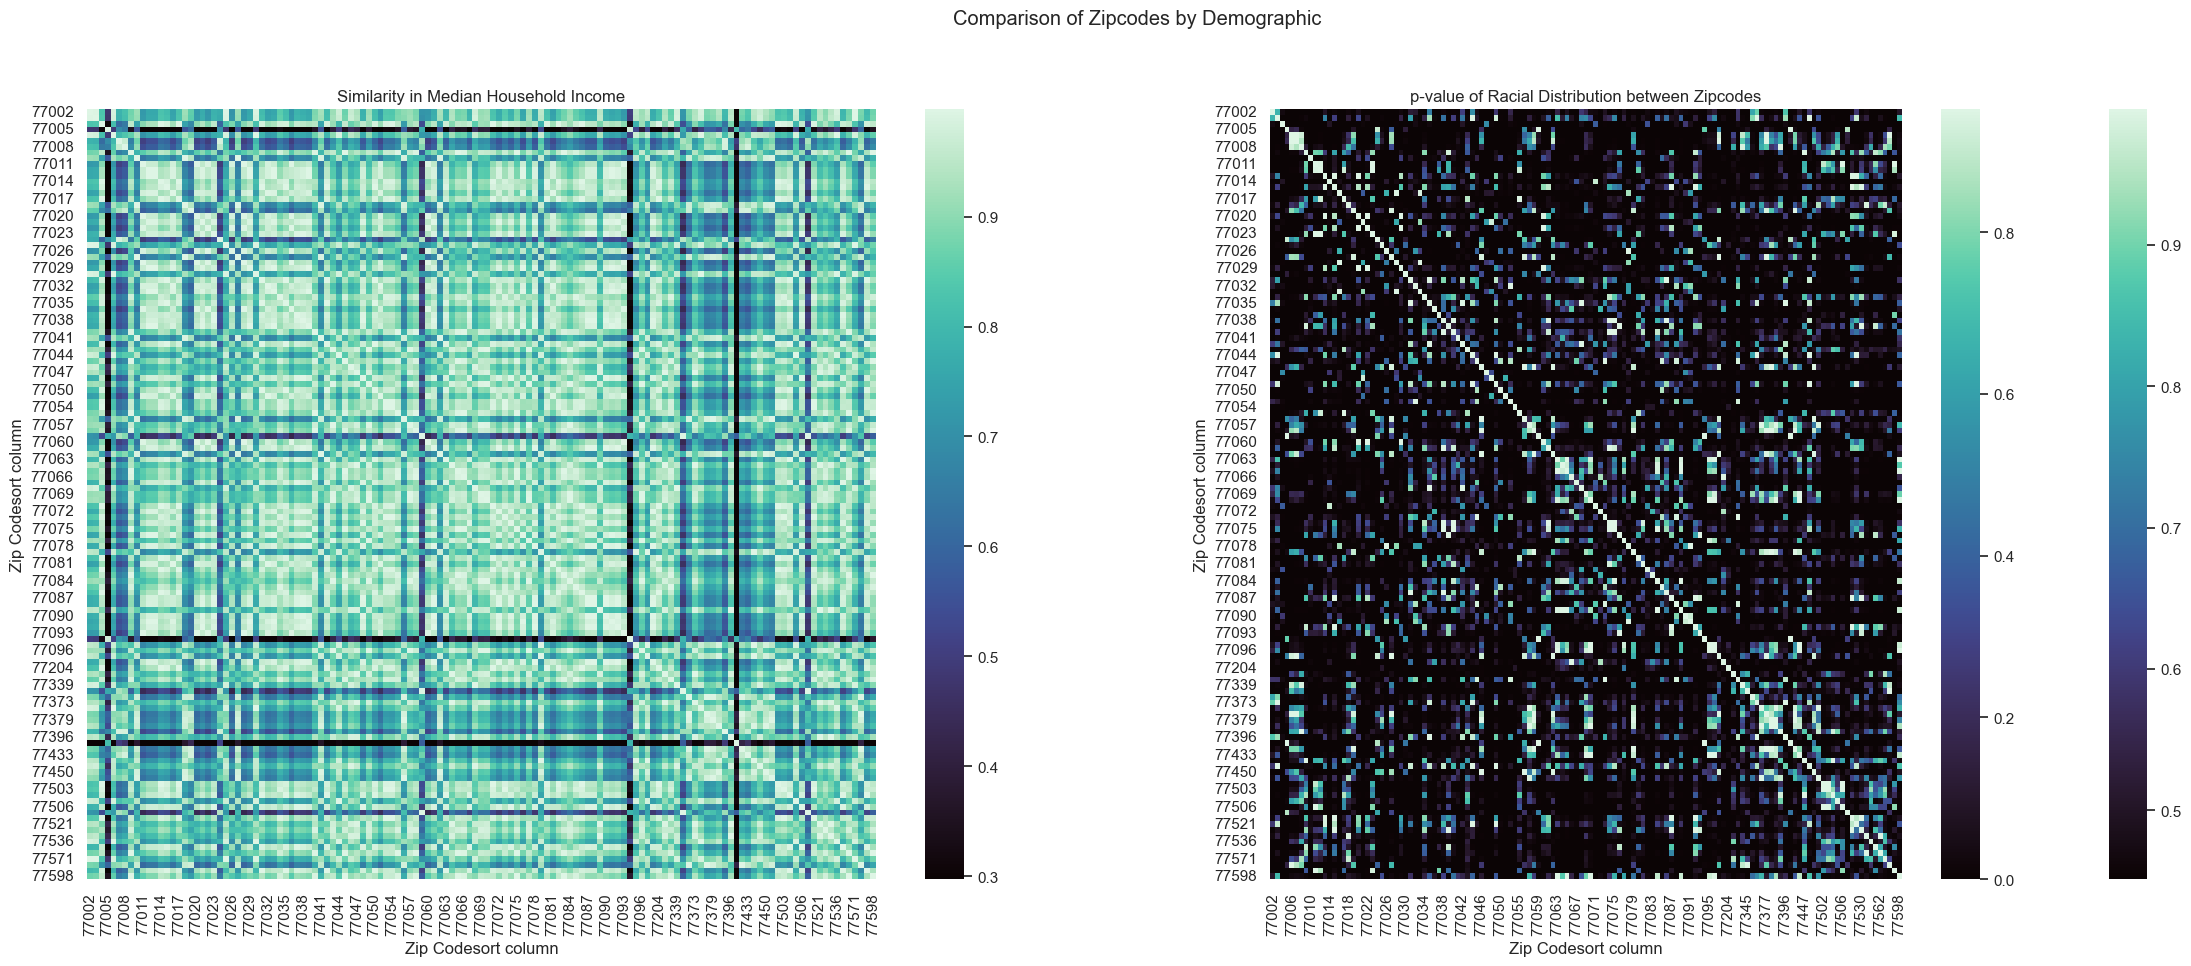

In [11]:
from zipcode_to_precinct import prec_to_zip_dict
from zipcode_to_precinct import zip_to_prec_dict
from precinct_income_age_race import races_pvalue

In [4]:
targetted_zipcodes = []
for precinct in targetted_precincts:
    targetted_zipcodes.append(prec_to_zip_dict[precinct])
    # for zipcode in prec_to_zip_dict[precinct]:
    #     targetted_zipcodes.append
        # targetted_zipcodes.add(zipcode)
targetted_zipcodes

[{77002, 77003},
 {77003, 77011},
 {77011},
 {77009, 77026},
 {77009, 77026},
 {77087},
 {77034, 77504},
 {77087},
 {77039, 77093},
 {77074, 77081},
 {77081},
 {77039},
 {77504},
 {77039},
 {77034, 77504}]

In [10]:
# for each targetted zipcode, find the best fit zipcode that is not in targetted_zipcodes

# dict mapping targetted zipcode : most similar non-targetted zipcode by racial distribution similarity
similar_race_zipcode = {}

for zipcode in targetted_zipcodes:
    greatest_p_value = 0
    most_similar = zipcode
    for zipcode_other in races_pvalue.columns:
        # don't consider targetted zipcodes
        if zipcode_other in targetted_zipcodes:
            continue
        if races_pvalue.loc[zipcode, zipcode_other] > greatest_p_value:
            greatest_p_value = races_pvalue.loc[zipcode, zipcode_other]
            most_similar = zipcode_other
    similar_race_zipcode[zipcode] = most_similar

# from zipcode, get precinct
similar_race_precinct = {} # map precinct : most similar non=targetted precinct by racial distributino similarity
# for precinct in targetted_precincts:

C:\Users\wwyim\AppData\Local\Temp\ipykernel_7204\446090271.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  if races_pvalue.loc[zipcode, zipcode_other] > greatest_p_value:


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
print(zip_to_prec_dict[77373], zip_to_prec_dict[77044])